In [1]:
import os, ast, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csv_path = 'C:/Users/user/Downloads/ปริมาณสินค้าคงคลัง_ยาขาดคราว - log2 (1).csv'

In [3]:
pd.set_option('display.max_columns', None)
sns.set_theme()

In [6]:
df = pd.read_csv(csv_path)

C:\Users\user\AppData\Local\Temp\ipykernel_1648\2731162379.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196409 entries, 0 to 196408
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ProductCode          196409 non-null  object 
 1   GenericName          196409 non-null  object 
 2   TradeName            196409 non-null  object 
 3   ProductTypeName      195869 non-null  object 
 4   ProductPricePerUnit  196409 non-null  float64
 5   ProductPrice         196409 non-null  int64  
 6   ProductStatus        196409 non-null  int64  
 7   ProductRemark        0 non-null       float64
 8   ProductUnitCode      196409 non-null  object 
 9   ProductUnitName      196409 non-null  object 
 10  ProductAll           24342 non-null   float64
 11  ProductRemain        196409 non-null  object 
 12  ProductAllocated     196409 non-null  object 
 13  LastUpdate           196409 non-null  object 
 14  enum_stock           193068 non-null  object 
 15  isRemoved        

In [8]:
df['isRemoved'].value_counts()

isRemoved
False            132423
ปกติ              15238
FALSE              7891
ยาขาดคราว          7356
ยาใกล้ขาดคราว       961
Name: count, dtype: int64

In [9]:
df['enum_stock'].value_counts()

enum_stock
ปกติ             96484
ยาขาดคราว        70153
FALSE            21478
ยาใกล้ขาดคราว     4953
Name: count, dtype: int64

In [5]:
df_clean = df.loc[df['isRemoved'] != True]

In [11]:
df_clean.to_csv('C:/Users/user/Downloads/log2.csv', index=False)

In [15]:
df_clean

,ProductCode,GenericName,TradeName,ProductTypeName,ProductPricePerUnit,ProductPrice,ProductStatus,ProductRemark,ProductUnitCode,ProductUnitName,ProductRemain,ProductAllocated,LastUpdate,enum_stock,isRemoved,daylog
0,097EBCD3-0F75-4AC0-98AA-A33B8AED586B,Pethidine HCl injection 50 mg/ml/amp,Pethidine HCl inj. 50 mg/ml/amp (10 amp/box),NaN,80.00,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,25095,518,10/7/2024 11:22:48,NaN,NaN,10/7/2024
1,0BC3546E-4F92-4F15-AEE4-07B4F24F26E8,Methadone HCl oral concentrate solution 10 mg/ml,Methadone HCl oral concentrate solution 10 mg/...,NaN,250.00,0,0,NaN,4CE8E50B-80B3-4003-B2B6-9D08C97DD814,Bottle,3210,55,10/7/2024 11:22:48,NaN,NaN,10/7/2024
2,0C639E72-027B-4807-B6B9-0992AAB12137,opium tincture,Opium Tincture 1% ( 41%-46% Ethanol) (ขนาดบรร...,NaN,269640.00,0,0,NaN,983CCAE4-8189-4829-A871-AE25E38EEC6C,ถัง,0,0,10/7/2024 11:22:48,NaN,NaN,10/7/2024
3,10F0BE1C-781B-4833-BF6D-EECE4D7D3ACA,Midazolam injection 15 mg/3 ml/amp,"Midazolam inj 15 mg/3 ml/amp (Hameln, Germany)...",NaN,180.00,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,0,0,10/7/2024 11:22:48,NaN,NaN,10/7/2024
4,140B3711-DB0E-43D7-A2E7-A002AEB87C07,Morphine sulfate IR tablets 10 mg,Morphine sulfate IR tablets 10 mg (100 tab/box),NaN,190.00,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,9958,287,10/7/2024 11:22:48,NaN,NaN,10/7/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250999,CE6679C8-44D2-4DC4-9573-74F5895B6182,Methylphenidate HCl modified release hard caps...,Ritalin LA 20 mg (30 cap/box),(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,1200.00,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,6188,"2,054",6/17/2025 8:15:02,ปกติ,False,6/17/2025
251000,704a211b-896a-40c7-b8e7-4655edf80f9b,Esketamine HCl nasal spray 28 mg,Spravato 28 mg (1 device/box),(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,6500.00,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,952,5,6/17/2025 8:15:02,ปกติ,False,6/17/2025
251001,24b00027-b50b-47ec-ab23-565d094901e2,Pseudoephedrine HCl powder,"Pseudoephedrine HCl powder (Malladi, India)",(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,2608.77,0,0,NaN,0DB401C5-F370-4B77-B305-0F45635B636C,kilogram,25,0,6/17/2025 8:15:02,ยาใกล้ขาดคราว,False,6/17/2025
251003,fae155f3-1909-469c-ae8f-01a35bdd3b0a,Methylergometrine maleate,"Methylergometrine maleate (TAPI, Czech) (LBS)",(ยส. 4) ยาเสพติดให้โทษในประเภท 4,7324.71,0,0,NaN,5CD38166-D873-40C9-AEB4-9B0BCF1862C3,gram,0,0,6/17/2025 8:15:02,ยาขาดคราว,NaN,6/17/2025


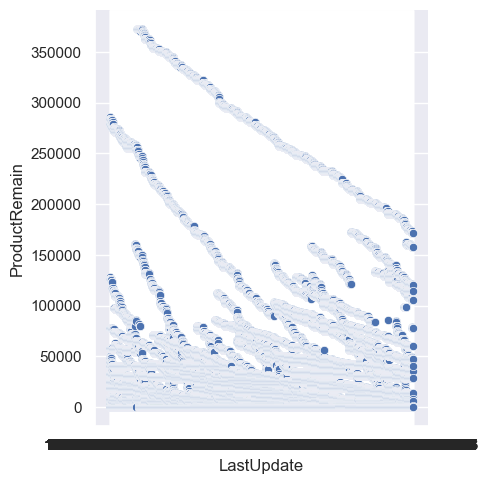

In [16]:
sns.relplot(
    data=df_clean,
    x='LastUpdate', y='ProductRemain'
)

<Axes: xlabel='LastUpdate', ylabel='ProductRemain'>

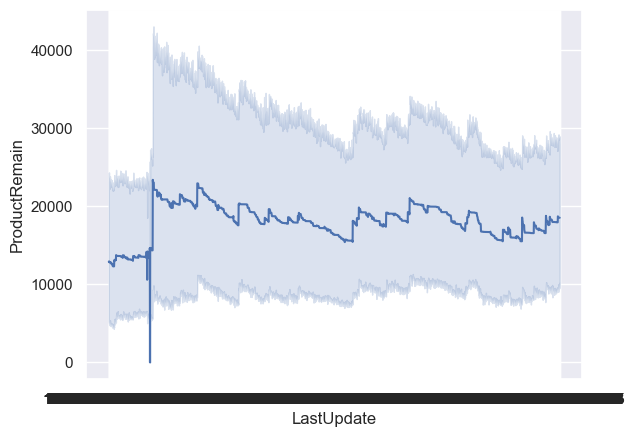

In [17]:
sns.lineplot(
    data=df_clean,
    x='LastUpdate', y='ProductRemain'
)

In [19]:
df_clean.loc[df_clean['GenericName'] == 'Midazolam injection 15 mg/3 ml/amp']

,ProductCode,GenericName,TradeName,ProductTypeName,ProductPricePerUnit,ProductPrice,ProductStatus,ProductRemark,ProductUnitCode,ProductUnitName,ProductRemain,ProductAllocated,LastUpdate,enum_stock,isRemoved,daylog
3,10F0BE1C-781B-4833-BF6D-EECE4D7D3ACA,Midazolam injection 15 mg/3 ml/amp,"Midazolam inj 15 mg/3 ml/amp (Hameln, Germany)...",NaN,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,0,0,10/7/2024 11:22:48,NaN,NaN,10/7/2024
32,6F5A22E0-68F2-4734-A4B2-02F24155D291,Midazolam injection 15 mg/3 ml/amp,Midazolam-Hameln inj 15 mg/3 ml (Siam Bioscien...,NaN,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,77845,602,10/7/2024 11:22:48,NaN,NaN,10/7/2024
93,10F0BE1C-781B-4833-BF6D-EECE4D7D3ACA,Midazolam injection 15 mg/3 ml/amp,"Midazolam inj 15 mg/3 ml/amp (Hameln, Germany)...",NaN,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,0,0,10/7/2024 12:14:49,NaN,NaN,10/7/2024
122,6F5A22E0-68F2-4734-A4B2-02F24155D291,Midazolam injection 15 mg/3 ml/amp,Midazolam-Hameln inj 15 mg/3 ml (Siam Bioscien...,NaN,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,77845,592,10/7/2024 12:14:49,NaN,NaN,10/7/2024
183,10F0BE1C-781B-4833-BF6D-EECE4D7D3ACA,Midazolam injection 15 mg/3 ml/amp,"Midazolam inj 15 mg/3 ml/amp (Hameln, Germany)...",NaN,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,0,0,10/7/2024 14:14:50,NaN,NaN,10/7/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250562,6F5A22E0-68F2-4734-A4B2-02F24155D291,Midazolam injection 15 mg/3 ml/amp,Midazolam-Hameln inj 15 mg/3 ml (Siam Bioscien...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,114252,"1,767",6/17/2025 0:15:04,ปกติ,False,6/17/2025
250657,6F5A22E0-68F2-4734-A4B2-02F24155D291,Midazolam injection 15 mg/3 ml/amp,Midazolam-Hameln inj 15 mg/3 ml (Siam Bioscien...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,114252,"1,767",6/17/2025 2:15:04,ปกติ,False,6/17/2025
250752,6F5A22E0-68F2-4734-A4B2-02F24155D291,Midazolam injection 15 mg/3 ml/amp,Midazolam-Hameln inj 15 mg/3 ml (Siam Bioscien...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,114252,"1,767",6/17/2025 4:15:02,ปกติ,False,6/17/2025
250847,6F5A22E0-68F2-4734-A4B2-02F24155D291,Midazolam injection 15 mg/3 ml/amp,Midazolam-Hameln inj 15 mg/3 ml (Siam Bioscien...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,180.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,114252,"1,767",6/17/2025 6:15:04,ปกติ,False,6/17/2025


In [6]:
df_mid_big = df_clean.loc[df_clean['GenericName'] == 'Midazolam injection 15 mg/3 ml/amp']

In [7]:
df_mid_big.loc[:,'LastUpdate'] = pd.to_datetime(df_mid_big['LastUpdate'])

KeyboardInterrupt: 

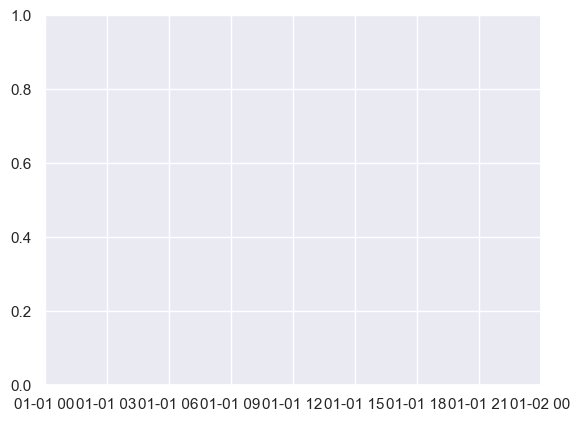

In [8]:
sns.lineplot(
    data=df_mid_big,
    x='LastUpdate', y='ProductRemain'
)

<Axes: xlabel='LastUpdate', ylabel='ProductRemain'>

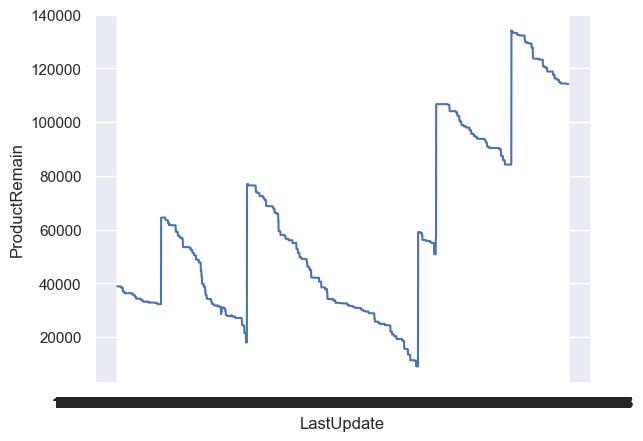

In [22]:
sns.lineplot(
    data=df_mid_big, kind="line",
    x='LastUpdate', y='ProductRemain',
    errorbar=None
)

In [8]:
df_mid_small = df_clean.loc[df_clean['GenericName'] == 'Midazolam injection 5 mg/ml/amp']

<h1>Ensure 'LastUpdate' is a datetime object</h1>

In [9]:
df_mid_small.loc[:,'LastUpdate'] = pd.to_datetime(df_mid_small['LastUpdate'])

<Axes: xlabel='LastUpdate', ylabel='ProductRemain'>

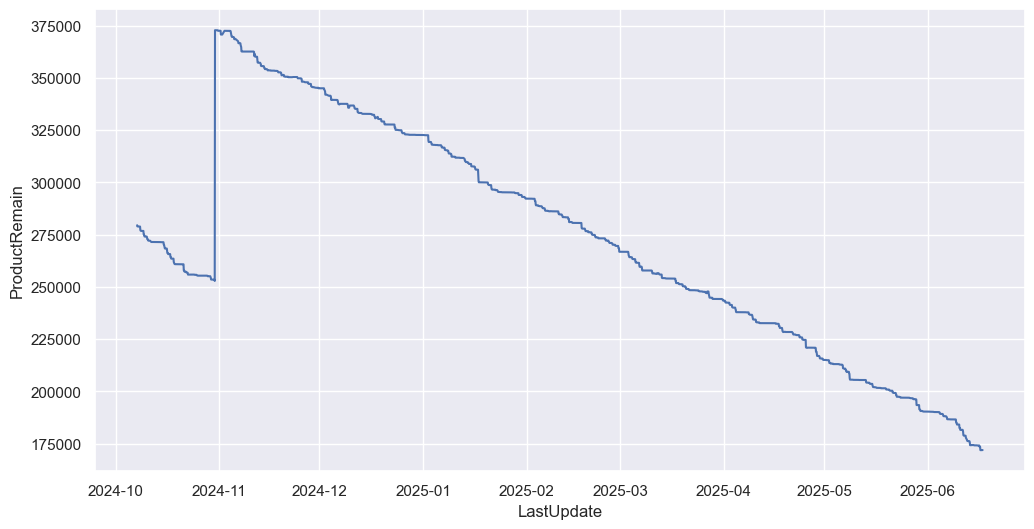

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_mid_small,
    x='LastUpdate', y='ProductRemain',
    errorbar=None
)

In [10]:
# Set 'LastUpdate' as index for resampling
df_resampled = df_mid_small.set_index('LastUpdate')

# Example: Resample to daily mean
# You can change 'D' to 'H' for hourly, 'W' for weekly, 'M' for monthly
df_daily_mean = df_resampled['ProductRemain'].resample('D').mean().reset_index()

C:\Users\user\root_dir\src\envfda1\Lib\site-packages\pandas\core\indexes\base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [12]:
df_mid_small = df_mid_small.sort_values(by='LastUpdate').reset_index(drop=True)

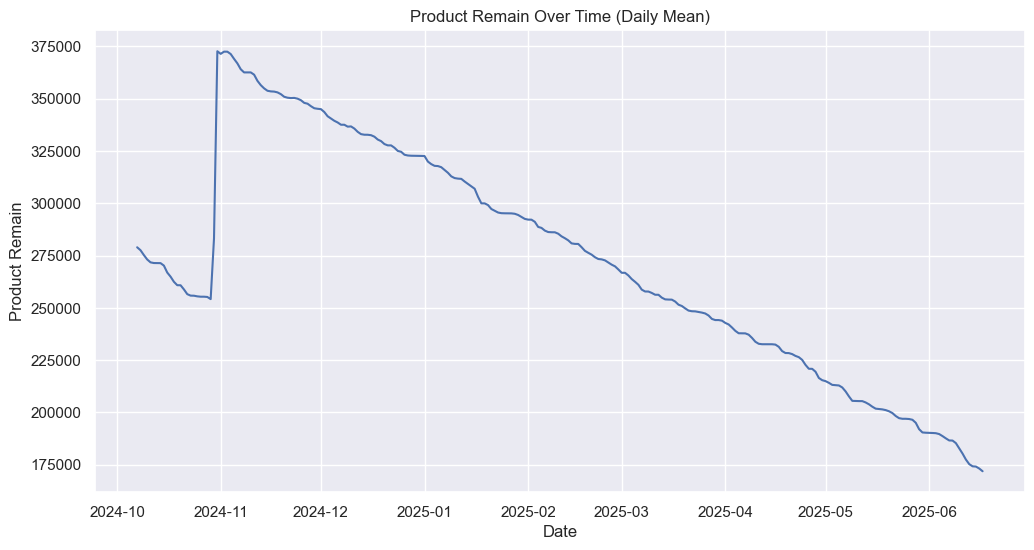

In [13]:
# Now plot the resampled data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily_mean, x='LastUpdate', y='ProductRemain', errorbar=None)
plt.title('Product Remain Over Time (Daily Mean)')
plt.xlabel('Date')
plt.ylabel('Product Remain')
plt.show()

In [14]:
df_mid_small['deltaProductRemain'] = df_mid_small['ProductRemain'].diff().fillna(0)

In [15]:
df_mid_small.loc[df_mid_small['deltaProductRemain'] == 0]

,ProductCode,GenericName,TradeName,ProductTypeName,ProductPricePerUnit,ProductPrice,ProductStatus,ProductRemark,ProductUnitCode,ProductUnitName,ProductRemain,ProductAllocated,LastUpdate,enum_stock,isRemoved,daylog,deltaProductRemain
0,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,NaN,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,279445,"3,511",2024-10-07 11:22:48,NaN,NaN,10/7/2024,0.0
6,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278832,"2,917",2024-10-07 22:14:49,NaN,NaN,10/7/2024,0.0
7,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278832,"2,917",2024-10-08 02:14:54,NaN,NaN,10/8/2024,0.0
8,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278832,"2,917",2024-10-08 04:14:51,NaN,NaN,10/8/2024,0.0
9,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278832,"2,917",2024-10-08 06:14:59,NaN,NaN,10/8/2024,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171823,"7,460",2025-06-16 22:15:03,ปกติ,False,6/16/2025,0.0
2722,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171876,"7,407",2025-06-17 02:15:04,ปกติ,False,6/17/2025,0.0
2723,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171876,"7,407",2025-06-17 04:15:02,ปกติ,False,6/17/2025,0.0
2724,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0,0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171876,"7,407",2025-06-17 06:15:04,ปกติ,False,6/17/2025,0.0


In [17]:
df_mid_small['deltaProductRemain_Sold'] = -df_mid_small['deltaProductRemain']

<h1> detect restock events</h1>

In [18]:
df_mid_small['deltaProductRemain_Sold'] = df_mid_small['deltaProductRemain_Sold'].apply(lambda x: x if x > 0 else 0)

In [19]:
df_mid_small = df_mid_small.loc[df_mid_small['deltaProductRemain'] != 0]

In [20]:
df_mid_small['deltaTime'] = df_mid_small['LastUpdate'].diff()

In [21]:
df_mid_small['deltaTime'] = df_mid_small['deltaTime'].fillna(pd.Timedelta(seconds=0))

In [24]:
df_mid_small['deltaTime_hours'] = df_mid_small['deltaTime'].dt.total_seconds() / 3600

In [25]:
df_mid_small.loc[0, 'deltaTime_hours'] = np.nan

In [26]:
df_mid_small['SaleRate_Per_Hour'] = df_mid_small['deltaProductRemain_Sold'] / df_mid_small['deltaTime_hours']

In [27]:
df_mid_small['SaleRate_Per_Hour'] = df_mid_small['SaleRate_Per_Hour'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [58]:
df_mid_small

,ProductCode,GenericName,TradeName,ProductTypeName,ProductPricePerUnit,ProductPrice,ProductStatus,ProductRemark,ProductUnitCode,ProductUnitName,ProductRemain,ProductAllocated,LastUpdate,enum_stock,isRemoved,daylog,deltaProductRemain,deltaProductRemain_Sold,deltaTime,deltaTime_hours,SaleRate_Per_Hour,SaleRate_Per_Hour_Interval,Date
1,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,NaN,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278945.0,"4,011",2024-10-07 12:14:49,NaN,NaN,10/7/2024,-500.0,500.0,0 days 00:00:00,0.000000,0.000000,0.000000,2024-10-07
2,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,NaN,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278898.0,"4,038",2024-10-07 14:14:50,NaN,NaN,10/7/2024,-47.0,47.0,0 days 02:00:01,2.000278,23.496737,23.496737,2024-10-07
3,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,NaN,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278867.0,"2,882",2024-10-07 16:14:49,ปกติ,NaN,10/7/2024,-31.0,31.0,0 days 01:59:59,1.999722,15.502153,15.502153,2024-10-07
4,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,NaN,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278837.0,"2,912",2024-10-07 18:14:52,ปกติ,NaN,10/7/2024,-30.0,30.0,0 days 02:00:03,2.000833,14.993753,14.993753,2024-10-07
5,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,NaN,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,278832.0,"2,917",2024-10-07 20:14:56,ปกติ,NaN,10/7/2024,-5.0,5.0,0 days 02:00:04,2.001111,2.498612,2.498612,2024-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,173453.0,"6,033",2025-06-16 14:15:01,ปกติ,False,6/16/2025,-23.0,23.0,0 days 03:59:56,3.998889,5.751598,5.751598,2025-06-16
2717,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171893.0,"7,390",2025-06-16 16:15:05,ปกติ,False,6/16/2025,-1560.0,1560.0,0 days 02:00:04,2.001111,779.566907,779.566907,2025-06-16
2718,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171823.0,"7,460",2025-06-16 18:15:05,ปกติ,False,6/16/2025,-70.0,70.0,0 days 02:00:00,2.000000,35.000000,35.000000,2025-06-16
2721,6D9D125F-7918-43E6-A98C-9EFAD6CA21E0,Midazolam injection 5 mg/ml/amp,Midazolam-Hameln inj 5 mg/ml (Siam Bioscience)...,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,150.0,0.0,0.0,NaN,06E9F1D3-35B4-463C-B396-9D0E088B2AD0,Box,171876.0,"7,407",2025-06-17 00:15:04,ปกติ,False,6/17/2025,53.0,0.0,0 days 05:59:59,5.999722,0.000000,0.000000,2025-06-17


In [29]:
df_mid_small['SaleRate_Per_Hour_Interval'] = df_mid_small['deltaProductRemain_Sold'] / df_mid_small['deltaTime_hours']

In [30]:
df_mid_small['SaleRate_Per_Hour_Interval'] = df_mid_small['SaleRate_Per_Hour_Interval'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [42]:
df_mid_small['LastUpdate'] = pd.to_datetime(df_mid_small['LastUpdate'])

In [43]:
df_mid_small['Date'] = df_mid_small['LastUpdate'].dt.date

In [44]:
df_mid_small['LastUpdate'].dtype

dtype('<M8[ns]')

In [45]:
daily_summary = df_mid_small.groupby('Date').agg(
    TotalProductsSold=('deltaProductRemain_Sold', 'sum'),
    TotalTimeElapsedHours=('deltaTime_hours', 'sum')
).reset_index()

In [46]:
daily_summary['DailyAvgSaleRate_Per_Hour'] = daily_summary['TotalProductsSold'] / daily_summary['TotalTimeElapsedHours']

In [47]:
daily_summary['DailyAvgSaleRate_Per_Hour'] = daily_summary['DailyAvgSaleRate_Per_Hour'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [48]:
daily_summary['DailyTotalSales'] = daily_summary['TotalProductsSold']

In [51]:
daily_summary

,Date,TotalProductsSold,TotalTimeElapsedHours,DailyAvgSaleRate_Per_Hour,DailyTotalSales
0,2024-10-07,613.0,8.001944,76.606380,613.0
1,2024-10-08,2097.0,21.998333,95.325403,2097.0
2,2024-10-09,2686.0,24.000833,111.912781,2686.0
3,2024-10-10,1989.0,28.074722,70.846649,1989.0
4,2024-10-11,614.0,19.924444,30.816418,614.0
...,...,...,...,...,...
232,2025-06-13,1951.0,19.998889,97.555420,1951.0
233,2025-06-14,141.0,26.000000,5.423077,141.0
234,2025-06-15,67.0,21.999722,3.045493,67.0
235,2025-06-16,2239.0,24.000833,93.288427,2239.0


In [49]:
daily_summary.loc[daily_summary['DailyTotalSales']==0]

,Date,TotalProductsSold,TotalTimeElapsedHours,DailyAvgSaleRate_Per_Hour,DailyTotalSales
15,2024-10-23,0.0,8.000000,0.0,0.0
23,2024-11-02,0.0,25.999167,0.0,0.0
42,2024-11-23,0.0,8.002500,0.0,0.0
59,2024-12-10,0.0,10.046111,0.0,0.0
101,2025-01-25,0.0,8.001111,0.0,0.0
213,2025-05-24,0.0,4.000000,0.0,0.0
236,2025-06-17,0.0,5.999722,0.0,0.0


In [52]:
daily_summary2 = daily_summary.loc[daily_summary['DailyTotalSales']!=0]

<Axes: xlabel='Date', ylabel='DailyTotalSales'>

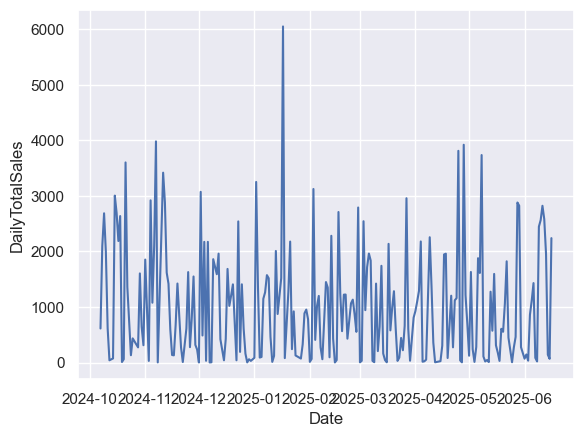

In [53]:
sns.lineplot(data=daily_summary2, x='Date', y='DailyTotalSales', errorbar=None)

In [55]:
daily_summary['DailyTotalSales'].mean()

992.7299578059071

In [57]:
daily_summary['DailyTotalSales'].std()

1038.763657066801

In [59]:
mean_daily_sale = daily_summary['DailyTotalSales'].mean()
std_daily_sale = daily_summary['DailyTotalSales'].std()

In [61]:
hours_per_day = 24
mean_hourly_sales = mean_daily_sale / hours_per_day
print(f"Mean Hourly Sales: {mean_hourly_sales:.4f} units/hour")

Mean Hourly Sales: 41.3637 units/hour


In [158]:
std_daily_sale

1038.763657066801

In [63]:
std_hourly_for_band = std_daily_sale / hours_per_day

In [163]:
print(f"Sample standard deviation: {std_hourly_for_band:.4f}")

Sample standard deviation: 43.2818


In [164]:
print(f"z_score: {z_score:.2f}")

z_score: 1.00


In [64]:
last_observed_time = df_mid_small['LastUpdate'].max()

In [126]:
extrapolation_period_days = 360

In [127]:
future_hours = extrapolation_period_days * hours_per_day

In [128]:
future_timestamps = pd.to_datetime(
    [last_observed_time + pd.Timedelta(hours=i) for i in range(1, future_hours + 1)]
)

In [129]:
extrapolated_df = pd.DataFrame({
    'LastUpdate': future_timestamps
})

In [96]:
len(df_mid_small['ProductRemain'])

935

In [99]:
df_mid_small['ProductRemain'].tail(5)

2716    173453.0
2717    171893.0
2718    171823.0
2721    171876.0
0            NaN
Name: ProductRemain, dtype: float64

In [130]:
last_product_remain = df_mid_small['ProductRemain'].iloc[len(df_mid_small['ProductRemain'])-2]

In [131]:
last_product_remain

171876.0

In [84]:
mean_hourly_sales

41.363748241912795

In [85]:
future_hours

2160

In [132]:
projected_product_remain = [last_product_remain - (mean_hourly_sales * i) for i in range(1, future_hours + 1)]

In [133]:
extrapolated_df['ProductRemain_Mean'] = projected_product_remain

In [72]:
z_score = 1

In [134]:
extrapolated_df['Cumulative_Hours_From_Last'] = (extrapolated_df['LastUpdate'] - last_observed_time).dt.total_seconds() / 3600

In [135]:
extrapolated_df['Cumulative_Days_From_Last'] = extrapolated_df['Cumulative_Hours_From_Last'] / hours_per_day

In [136]:
extrapolated_df

,LastUpdate,ProductRemain_Mean,Cumulative_Hours_From_Last,Cumulative_Days_From_Last
0,2025-06-17 01:15:04,171834.636252,1.0,0.041667
1,2025-06-17 02:15:04,171793.272504,2.0,0.083333
2,2025-06-17 03:15:04,171751.908755,3.0,0.125000
3,2025-06-17 04:15:04,171710.545007,4.0,0.166667
4,2025-06-17 05:15:04,171669.181259,5.0,0.208333
...,...,...,...,...
8635,2026-06-11 20:15:04,-185341.329817,8636.0,359.833333
8636,2026-06-11 21:15:04,-185382.693565,8637.0,359.875000
8637,2026-06-11 22:15:04,-185424.057314,8638.0,359.916667
8638,2026-06-11 23:15:04,-185465.421062,8639.0,359.958333


In [137]:
extrapolated_df['ProductRemain_Upper'] = extrapolated_df['ProductRemain_Mean'] + (z_score * std_daily_sale * np.sqrt(extrapolated_df['Cumulative_Days_From_Last']))
extrapolated_df['ProductRemain_Lower'] = extrapolated_df['ProductRemain_Mean'] - (z_score * std_daily_sale * np.sqrt(extrapolated_df['Cumulative_Days_From_Last']))

In [138]:
extrapolated_df['ProductRemain_Lower'] = extrapolated_df['ProductRemain_Lower'].clip(lower=0)
extrapolated_df['ProductRemain_Mean'] = extrapolated_df['ProductRemain_Mean'].clip(lower=0) # Cap mean at 0 too
extrapolated_df['ProductRemain_Upper'] = extrapolated_df['ProductRemain_Upper'].clip(lower=0)

In [141]:
extrapolated_df = extrapolated_df.loc[extrapolated_df['ProductRemain_Mean'] >0]

In [143]:
extrapolated_df

,LastUpdate,ProductRemain_Mean,Cumulative_Hours_From_Last,Cumulative_Days_From_Last,ProductRemain_Upper,ProductRemain_Lower
0,2025-06-17 01:15:04,171834.636252,1.0,0.041667,172046.672995,171622.599508
1,2025-06-17 02:15:04,171793.272504,2.0,0.083333,172093.137742,171493.407265
2,2025-06-17 03:15:04,171751.908755,3.0,0.125000,172119.167168,171384.650342
3,2025-06-17 04:15:04,171710.545007,4.0,0.166667,172134.618494,171286.471520
4,2025-06-17 05:15:04,171669.181259,5.0,0.208333,172143.309831,171195.052686
...,...,...,...,...,...,...
4150,2025-12-06 23:15:04,175.081048,4151.0,172.958333,13836.238364,0.000000
4151,2025-12-07 00:15:04,133.717300,4152.0,173.000000,13796.520043,0.000000
4152,2025-12-07 01:15:04,92.353551,4153.0,173.041667,13756.801523,0.000000
4153,2025-12-07 02:15:04,50.989803,4154.0,173.083333,13717.082806,0.000000


In [154]:
last_lowerProjectedDate = None
for i,row in extrapolated_df.iterrows():
    if row.loc['ProductRemain_Lower'] == 0:
        last_lowerProjectedDate = row.loc['LastUpdate']
        break

In [155]:
last_lowerProjectedDate

Timestamp('2025-11-23 22:15:04')

In [151]:
lastRemainsDate = extrapolated_df.iloc[len(extrapolated_df)-1,0]

In [152]:
lastRemainsDate

Timestamp('2025-12-07 03:15:04')

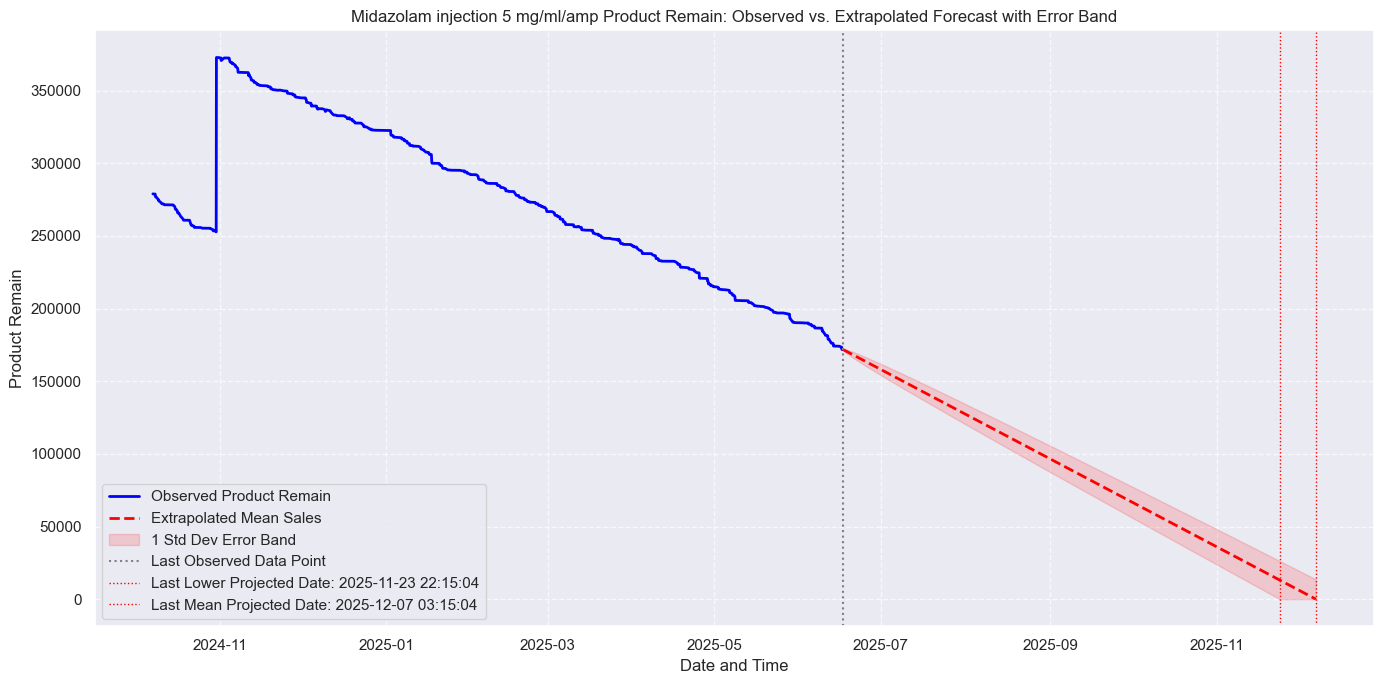

In [157]:
# Create a common column 'ProductRemain' for plotting observed data
df_observed_plot = df_mid_small[['LastUpdate', 'ProductRemain']].copy()
df_observed_plot['Type'] = 'Observed'

# Prepare extrapolated data for plotting
df_extrapolated_plot = extrapolated_df[['LastUpdate', 'ProductRemain_Mean']].copy()
df_extrapolated_plot['ProductRemain'] = df_extrapolated_plot['ProductRemain_Mean']
df_extrapolated_plot['Type'] = 'Extrapolated Mean'

# Concatenate for plotting the main lines
df_combined = pd.concat([df_observed_plot, df_extrapolated_plot])

plt.figure(figsize=(14, 7))

# Plot observed data
sns.lineplot(data=df_observed_plot, x='LastUpdate', y='ProductRemain', label='Observed Product Remain', color='blue', linewidth=2)

# Plot extrapolated mean
sns.lineplot(data=df_extrapolated_plot, x='LastUpdate', y='ProductRemain', label='Extrapolated Mean Sales', color='red', linestyle='--', linewidth=2)

# Plot the error band using fill_between
plt.fill_between(
    extrapolated_df['LastUpdate'],
    extrapolated_df['ProductRemain_Lower'],
    extrapolated_df['ProductRemain_Upper'],
    color='red',
    alpha=0.15,
    label=f'{z_score} Std Dev Error Band'
)

# Add a vertical line at the last observed point to separate observed from forecast
plt.axvline(last_observed_time, color='gray', linestyle=':', linewidth=1.5, label='Last Observed Data Point')
plt.axvline(last_lowerProjectedDate, color='red', linestyle=':', linewidth=1, label=f'Last Lower Projected Date: {last_lowerProjectedDate}')
plt.axvline(lastRemainsDate, color='red', linestyle=':', linewidth=1, label=f'Last Mean Projected Date: {lastRemainsDate}')

plt.title('Midazolam injection 5 mg/ml/amp Product Remain: Observed vs. Extrapolated Forecast with Error Band')
plt.xlabel('Date and Time')
plt.ylabel('Product Remain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()